# WeatherPy
----

#### Observations
* 1. There is a strong correlation between latitude and max temp for both hemispheres. Northern hemisphere gets colder the further north you go from he equator while the southern hemisphere gets colder the further south you go from the equator.
* 2. The vast majority of locations have a humidity percentage of over 50%. This has little to no reliance on latitude. 
* 3. The vast majority of locations have a wind speed of 15mph or less. This also has little to no reliance on latitude.
* 4. Cloudiness is completely unaffected by the latitude of a location. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) #size should be 1500 in this and below
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If statement that determines if the city is unique, then adds it to a our cities list (only if unique)
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#empty lists to store info
usedLats=[]
usedLngs=[]
maxTemp=[]
humidity=[]
cloudiness=[]
windSpeed=[]
country=[]
date=[]
usedCities=[]

# Set up API call information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


print("Beginning Data Retrieval")
print("-------------------------------")

#iterate through each city
for city in cities:
    
    #send the request
    response = requests.get(query_url + city).json()
    
    #track record number
    recordNum=cities.index(city)+1  
    
    try: 
        #append info to corresponding list above
        usedLats.append(response['coord']['lat'])
        usedLngs.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])     
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windSpeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        usedCities.append(city)
        
        #print to make it known it was successful
        print(f"Processing Record {recordNum} of Set 1 | {city}")
        
    except:
        #if unable to retrieve some info, show skipping message
        print(f"The city, {city}, was not found. Skipping...")    
        


Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | methoni
The city, palabuhanratu, was not found. Skipping...
Processing Record 3 of Set 1 | popondetta
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | oriximina
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | havelock
Processing Record 10 of Set 1 | touros
Processing Record 11 of Set 1 | porosozero
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | constitucion
Processing Record 17 of Set 1 | cidreira
Processing Record 18 of Set 1 | otukpo
The city, belushya guba, was not found. Skipping...
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | bairiki
Processi

Processing Record 192 of Set 1 | pevek
Processing Record 193 of Set 1 | hamilton
Processing Record 194 of Set 1 | beitbridge
Processing Record 195 of Set 1 | semnan
Processing Record 196 of Set 1 | uige
Processing Record 197 of Set 1 | pisco
Processing Record 198 of Set 1 | santa rosalia
Processing Record 199 of Set 1 | alofi
Processing Record 200 of Set 1 | sai buri
Processing Record 201 of Set 1 | cayenne
Processing Record 202 of Set 1 | miri
Processing Record 203 of Set 1 | ilulissat
Processing Record 204 of Set 1 | kaitangata
Processing Record 205 of Set 1 | abalak
Processing Record 206 of Set 1 | port macquarie
Processing Record 207 of Set 1 | shache
Processing Record 208 of Set 1 | toamasina
Processing Record 209 of Set 1 | miramar
Processing Record 210 of Set 1 | shimoda
Processing Record 211 of Set 1 | riyadh
Processing Record 212 of Set 1 | biltine
Processing Record 213 of Set 1 | port hardy
Processing Record 214 of Set 1 | kamenka
Processing Record 215 of Set 1 | nikolskoye
P

Processing Record 384 of Set 1 | phan thiet
Processing Record 385 of Set 1 | redlands
Processing Record 386 of Set 1 | hirara
Processing Record 387 of Set 1 | mayna
Processing Record 388 of Set 1 | arandis
Processing Record 389 of Set 1 | nantucket
Processing Record 390 of Set 1 | boddam
Processing Record 391 of Set 1 | icatu
Processing Record 392 of Set 1 | hervey bay
The city, alotau, was not found. Skipping...
Processing Record 394 of Set 1 | severobaykalsk
Processing Record 395 of Set 1 | te anau
Processing Record 396 of Set 1 | midland
Processing Record 397 of Set 1 | umba
Processing Record 398 of Set 1 | byron bay
Processing Record 399 of Set 1 | port lincoln
Processing Record 400 of Set 1 | kampong cham
Processing Record 401 of Set 1 | bandarbeyla
Processing Record 402 of Set 1 | leningradskiy
Processing Record 403 of Set 1 | tecoanapa
Processing Record 404 of Set 1 | fairbanks
Processing Record 405 of Set 1 | river falls
Processing Record 406 of Set 1 | zhigansk
Processing Reco

Processing Record 578 of Set 1 | ranong
Processing Record 579 of Set 1 | usinsk
Processing Record 580 of Set 1 | grindavik
Processing Record 581 of Set 1 | port hawkesbury
Processing Record 582 of Set 1 | porbandar
The city, rawannawi, was not found. Skipping...
Processing Record 584 of Set 1 | port augusta
Processing Record 585 of Set 1 | skegness
Processing Record 586 of Set 1 | alibunar
Processing Record 587 of Set 1 | milkovo
Processing Record 588 of Set 1 | cervo
Processing Record 589 of Set 1 | chimbote
Processing Record 590 of Set 1 | general roca
Processing Record 591 of Set 1 | kurchum
Processing Record 592 of Set 1 | rio gallegos
Processing Record 593 of Set 1 | jabinyanah
Processing Record 594 of Set 1 | longfeng
Processing Record 595 of Set 1 | tall kayf
Processing Record 596 of Set 1 | trairi
Processing Record 597 of Set 1 | terney
The city, kazalinsk, was not found. Skipping...
Processing Record 599 of Set 1 | mandera
Processing Record 600 of Set 1 | yenangyaung
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv
* Display the DataFrame

In [5]:
#create data frame
weatherPy=pd.DataFrame({"City":usedCities,"Lat":usedLats,"Lng":usedLngs,"Max Temp":maxTemp,"Humidity":humidity,"Cloudiness":cloudiness,"Wind Speed":windSpeed,"Country":country,"Date":date})

#export to a CSV file
weatherPy.to_csv("Weather_Data.csv", encoding="utf-8", index=False)

#display first 5 in data frame
weatherPy.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,methoni,36.8197,21.7049,81.21,62,0,5.66,GR,1627248070
1,popondetta,-8.7537,148.2534,72.77,96,100,1.59,PG,1627248071
2,busselton,-33.6500,115.3333,58.08,65,22,20.89,AU,1627248071
3,hermanus,-34.4187,19.2345,60.91,53,100,10.00,ZA,1627248072
4,oriximina,-1.7656,-55.8661,88.43,44,99,4.43,BR,1627248072


In [6]:
#show all stats available for data frame
weatherPy.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,19.328104,15.704874,70.657324,68.843310,49.301056,7.784736,1.627248e+09
std,32.910448,90.247199,14.918341,21.637019,38.827923,5.198268,1.051107e+02
min,-54.800000,-179.166700,34.930000,5.000000,0.000000,0.000000,1.627247e+09
25%,-8.363300,-65.879725,59.047500,57.000000,6.000000,3.880000,1.627248e+09
50%,22.647300,19.637400,71.720000,74.000000,45.000000,6.910000,1.627248e+09
75%,46.419875,99.168250,80.935000,86.000000,90.000000,10.540000,1.627248e+09
max,78.218600,178.416700,106.430000,100.000000,100.000000,28.660000,1.627248e+09


## Inspect the data and remove the cities where the humidity > 100%.
----


In [8]:
#upload from the CSV file
weatherPyCSV=pd.read_csv('Weather_Data.csv')

#sort value by humidity %
weatherPyCSV=weatherPyCSV.sort_values("Humidity", ascending=False).reset_index()
weatherPyCSV.head()

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,69,chute-aux-outardes,49.1168,-68.3990,66.51,100,90,9.22,CA,1627248100
1,126,quimper,48.0000,-4.1000,62.67,100,44,6.91,FR,1627248125
2,211,clyde river,70.4692,-68.5914,35.83,100,90,6.91,CA,1627248159
3,222,sri aman,1.2376,111.4621,75.25,100,75,1.14,MY,1627248165
4,536,laem sing,12.4816,102.0738,79.95,99,100,10.36,TH,1627248306


In [9]:
#  Get the indices of cities that have humidity over 100%.
HumidityIndices=weatherPyCSV['City'].where(weatherPyCSV['Humidity'] > 100).to_frame(name='Humidity > 100')

indexList=HumidityIndices.index[HumidityIndices['Humidity > 100'].notnull()].tolist()


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
if len(indexList)!=0:
    print(f"There are columns to drop: {indexList}")
    for x in indexList:
        cleanWeatherPy=WeatherPyCSV.drop(indexList , inplace=False)
else:
    print("There are no columns to drop")

There are no columns to drop


In [12]:
#display cleaned data
weatherPyCSV.head()

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,69,chute-aux-outardes,49.1168,-68.3990,66.51,100,90,9.22,CA,1627248100
1,126,quimper,48.0000,-4.1000,62.67,100,44,6.91,FR,1627248125
2,211,clyde river,70.4692,-68.5914,35.83,100,90,6.91,CA,1627248159
3,222,sri aman,1.2376,111.4621,75.25,100,75,1.14,MY,1627248165
4,536,laem sing,12.4816,102.0738,79.95,99,100,10.36,TH,1627248306


# Plotting the Data

## Latitude vs. Temperature Plot

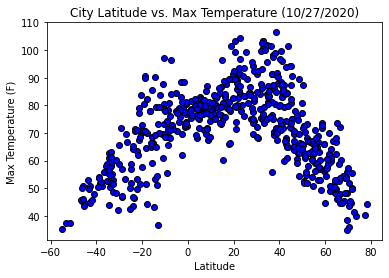

In [14]:
plt.title("City Latitude vs. Max Temperature (10/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.scatter(weatherPyCSV["Lat"], weatherPyCSV["Max Temp"], marker="o", facecolors="blue", edgecolors="black")

#### The above scatter plot shows latitude in relation to the location's Max temperature. We can see that the northern hemisphere
#### (to the right of 0 on the latitude line) gets colder the futher north you get. Conversely, the southern hemisphere gets
#### colder the further south you get from the equator.

## Latitude vs. Humidity Plot

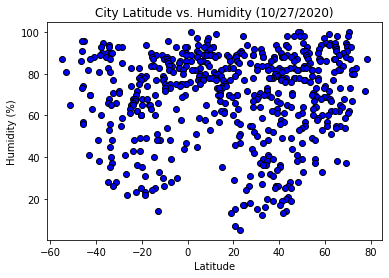

In [15]:
plt.title("City Latitude vs. Humidity (10/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(weatherPyCSV["Lat"], weatherPyCSV["Humidity"], marker="o", facecolors="blue", edgecolors="black")

#### The above scatter plot shows latitude in relation to the location's humidity. There's little correlation, but there does seem
#### to be many (visually more than 3/4of the data set) that have humidity higher than 50%. These locations are spread fairly evenly
#### between the northern and southern hemispheres.

## Latitude vs. Cloudiness Plot

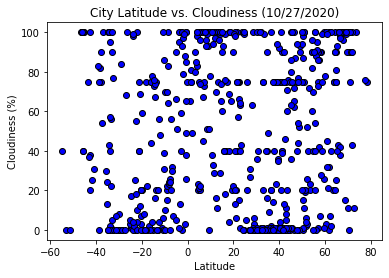

In [16]:
plt.title("City Latitude vs. Cloudiness (10/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(weatherPyCSV["Lat"], weatherPyCSV["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")

#### The above scatter plot show latitude in relation to cloudiness. There seems to be absolutely no relation between a location
#### and the amount of cloudiness it received.

## Latitude vs. Wind Speed Plot

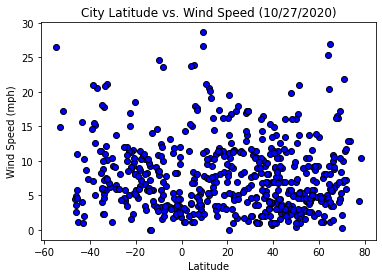

In [17]:
plt.title("City Latitude vs. Wind Speed (10/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(weatherPyCSV["Lat"], weatherPyCSV["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")

#### The above scatter plot shows latitude in relation to the locations wind speed (mph). There doesn't seem to be much relation
#### for wind speed compared to location, however, visually it seems that more than 3/4 of the locations experience wind speeds of
#### 15mph or less.

# Linear Regression

In [19]:
northernDF=weatherPyCSV[weatherPyCSV["Lat"]>=0]
southernDF=weatherPyCSV[weatherPyCSV["Lat"]<=0]

##  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6402173224571459


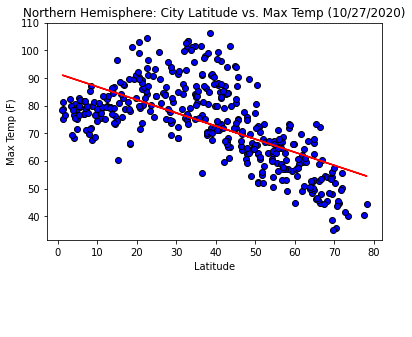

In [20]:
plt.title("Northern Hemisphere: City Latitude vs. Max Temp (10/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northernDF["Lat"], northernDF["Max Temp"])
print(f"The r-value is: {rvalue}")
regress_values = northernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northernDF["Lat"], northernDF["Max Temp"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(northernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.show()

##  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7413783943405955


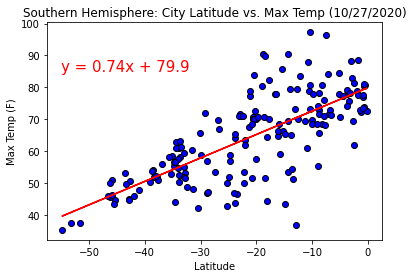

In [21]:
plt.title("Southern Hemisphere: City Latitude vs. Max Temp (10/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southernDF["Lat"], southernDF["Max Temp"])
print(f"The r-value is: {rvalue}")
regress_values = southernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southernDF["Lat"], southernDF["Max Temp"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(southernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")
plt.show()

#### The above two scatter plots show the norther and southern hemispheres, respectively, compared to the max temp in each location.
#### There is a relatively strong relation for each hemisphere and it's max temps, where northern hemisphere locations get colder
#### further north, while the southern hemisphere has colder temps further south.

##  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.011614914856420445


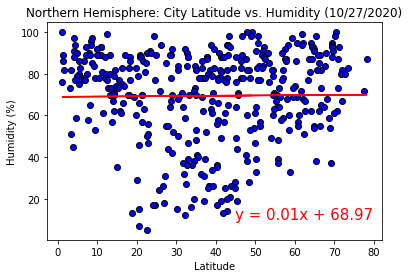

In [22]:
plt.title("Northern Hemisphere: City Latitude vs. Humidity (10/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northernDF["Lat"], northernDF["Humidity"])
print(f"The r-value is: {rvalue}")
regress_values = northernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northernDF["Lat"], northernDF["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(northernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.show()

##  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.011148456191659247


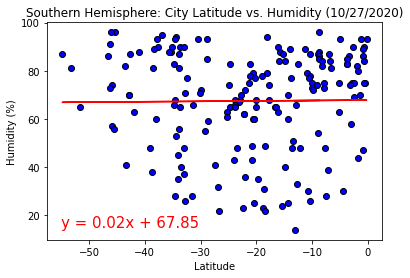

In [23]:
plt.title("Southern Hemisphere: City Latitude vs. Humidity (10/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southernDF["Lat"], southernDF["Humidity"])
print(f"The r-value is: {rvalue}")
regress_values = southernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southernDF["Lat"], southernDF["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(southernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.show()

#### The above two scatter plots show latitude vs humidity for both the northern and southern hemispheres. Neither hemisphere has
#### a strong relation between the two, however, the southern hemisphere has  the vast majority of cities with humidity over 50%
#### while the norther hemisphere has a lot more occurences of cities with humidity below 50% (however, the vast majority of  
#### cities still have humidity over 50%).
 

##  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.015236648392587893


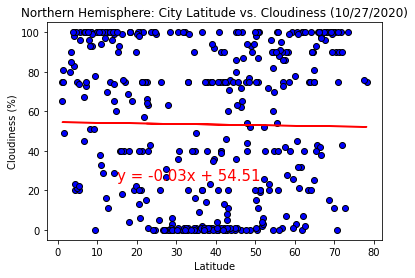

In [24]:
plt.title("Northern Hemisphere: City Latitude vs. Cloudiness (10/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northernDF["Lat"], northernDF["Cloudiness"])
print(f"The r-value is: {rvalue}")
regress_values = northernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northernDF["Lat"], northernDF["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(northernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(15,25),fontsize=15,color="red")
plt.show()

##  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.006035095986738265


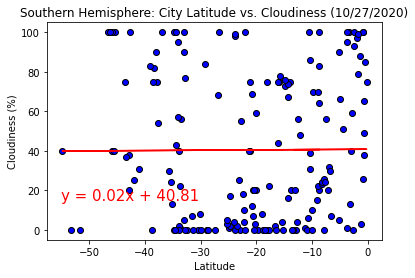

In [25]:
plt.title("Southern Hemisphere: City Latitude vs. Cloudiness (10/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southernDF["Lat"], southernDF["Cloudiness"])
print(f"The r-value is: {rvalue}")
regress_values = southernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southernDF["Lat"], southernDF["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(southernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.show()

#### The above two scatter plots show the relation between latitude and cloudiness for both the northern and southern hemispheres.
#### There is little to no relationship between these two variables. The number of places with cloudiness greater than 50% seems 
#### to be balanced with the number of places with cloudiness less than 50%, and both are spread evenly over all latitudes.

##  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.10852956752151927


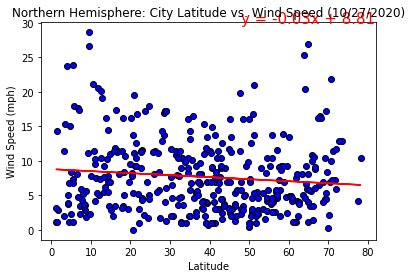

In [26]:
plt.title("Northern Hemisphere: City Latitude vs. Wind Speed (10/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northernDF["Lat"], northernDF["Wind Speed"])
print(f"The r-value is: {rvalue}")
regress_values = northernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northernDF["Lat"], northernDF["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(northernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(48,30),fontsize=15,color="red")
plt.show()

##  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2472817451851475


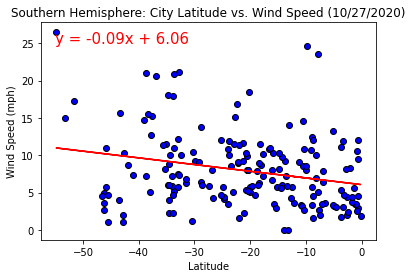

In [27]:
plt.title("Southern Hemisphere: City Latitude vs. Wind Speed (10/27/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southernDF["Lat"], southernDF["Wind Speed"])
print(f"The r-value is: {rvalue}")
regress_values = southernDF["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southernDF["Lat"], southernDF["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
plt.plot(southernDF["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.show()

#### The above two scatter plots show the relationship between latitude and wind speed for the nothern and southern hemispheres.
#### There doesn't seem to be a huge relation between the two for the northern or southern hemispheres, however but have a majority
#### of locations with wind speed of 15mph or less. 